# Normal Form Tutorial


### Import Normal Form Module

All of the functions and data required to work with the the Birkhoff and resonant normal forms can be imported with a single line of code. (Plus a second line for plotting everything!)

In [1]:
from NF_CR3BP.NF_CR3BP import *

import matplotlib.pyplot as plt #(Just for plotting)


## Forward Transformation

To start, the function $AAtoRTB$ transforms fromn the action-angle (AA) coordinates to restricted three-body (RTB) coordinates. This function works for all three collinear Lagrange points, both the Birkhoff and resonant normal forms, and both the analytical and numerical methods of transformation.

### AAtoRTB

$[I_1,I_2,I_3,\phi_1,\phi_2,\phi_3] \to [x,y,x,\dot{x},\dot{y},\dot{z}]$ (Birkhoff)

$[\hat{I}_1,\hat{I}_2,\hat{I}_3,\theta_1,\theta_2,\theta_3] \to [x,y,x,\dot{x},\dot{y},\dot{z}]$ (Resonant)

Feel free to play around with the parameters in the following code block. NOTE: when using the resonant normal form transformation, ensure that $\hat{I}_3 \geq \hat{I}_2$. For Lagrange points $L_1$ and $L_2$, actions can be selected on the interval $[0,8]$ (and even a bit higher) without any issue. For $L_3$, actions should be sampled from a significantly smaller interval, something like $[0,0.03]$.

In [3]:
AA0 = [0,0.3,0,0,0,0]



print(AAtoRTB(AA0,Lpt=1,nftype='Birkhoff',method='anl'))
print(AAtoRTB(AA0,Lpt=1,nftype='Birkhoff',method='num'))





[ 0.84884841 -0.08490189  0.         -0.0581258   0.00645581  0.        ]
[ 0.84884837 -0.08490187  0.         -0.0581258   0.00645563  0.        ]


Calling the function for each state would be a bit tedious, so $AAtoRTB$ has been set up to accept arrays of action-angle states. To illustrate the utility, let's sample a number of points along a vertical Lyapunov orbit in the action-angle space, and then convert them to RTB coordinates about the $L_2$ Lagrange point.

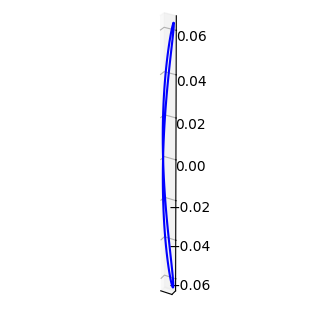

In [4]:
AA0 = [0,0,0.2,0,0,0]

phi2array = np.linspace(0,2*np.pi,100)


AAarray = np.zeros([len(phi2array),6],dtype=complex)
AAarray[:,1] = AA0[1]*np.ones([1,len(phi2array)])
AAarray[:,2] = AA0[2]*np.ones([1,len(phi2array)])
AAarray[:,5] = phi2array.T
AAarray = AAarray.T

RTBarray = AAtoRTB(AAarray,Lpt=1,nftype='Birkhoff',method='anl')


#Plotting stuff:
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(projection='3d')
ax.plot(RTBarray[0],RTBarray[1],RTBarray[2],color='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='z', pad=100)
ax.set_aspect('equal')
ax.set
plt.show()



### Action-Angle Propagation
The function $AAprop$ takes in an initial condition in action-angle coordinates and propagates in the action-angle space for a prescribed array of times. Let's use it to generate a Lissajous trajectory about $L_2$ using the Birkhoff normal form. (This currently only works for the Birkhoff normal form)

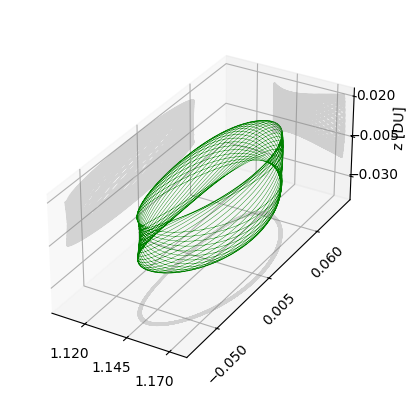

In [5]:
AA0 = [0,0.1,0.007,0,0,0]

M = 2000
tspan = np.linspace(0,100,M)

AAarray = AAprop(tspan,AA0,Lpt=2)

LissajousTrajectory = AAtoRTB(AAarray,Lpt=2).T



#Plotting stuff:
fig3 = plt.figure(figsize=[5,5])
ax = fig3.add_subplot(projection='3d')
ax.plot(LissajousTrajectory[0],LissajousTrajectory[1],LissajousTrajectory[2],color='green',alpha=1,linewidth=0.3)
xlim = ax.get_xticks()
ylim = ax.get_yticks()
zlim = ax.get_zticks()
xedge = np.round(xlim[0],3)-0.02
yedge = np.round(ylim[-1],3)+0.02
zedge = np.round(zlim[0],3)-0.02
ax.set_xlim([xedge,xlim[-1]])
ax.set_ylim([ylim[0],yedge])
ax.set_zlim([zedge,zlim[-1]])
ax.set_xticks(np.linspace(np.round(xlim[1]-0.01,2),np.round(xlim[-2],2),3))
ax.set_yticks(np.linspace(np.round(ylim[1]+0.01,2),np.round(ylim[-2],2),3))
ax.set_zticks(np.linspace(np.round(zlim[1]-0.01,2),np.round(zlim[-2],2),3))
ax.set_zlabel('z [DU]')
plt.setp(ax.get_yticklabels(), rotation=45)
ax.plot(LissajousTrajectory[0],LissajousTrajectory[1],zedge,color='gray',alpha=0.3)
ax.plot(LissajousTrajectory[0],yedge,LissajousTrajectory[2],color='gray',alpha=0.3)
ax.plot(xedge,LissajousTrajectory[1],LissajousTrajectory[2],color='gray',alpha=0.3)
ax.set_aspect('equal')
plt.show()

Let's look at how the resonant Lissajous differs from the Birkhoff Lissajous.

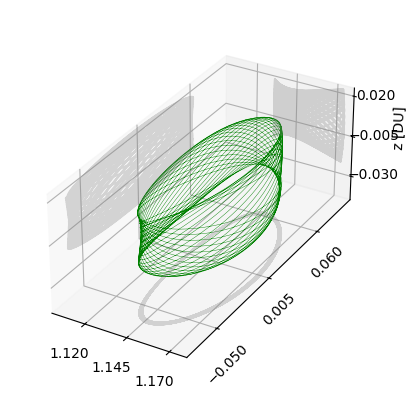

In [6]:
AA0 = [0,0.1,0.107,0,0,0]

M = 2000
tspan = np.linspace(0,100,M)

AAarray = AAprop(tspan,AA0,Lpt=2,nftype='Resonant')

LissajousTrajectory = AAtoRTB(AAarray,Lpt=2,nftype='Resonant').T



#Plotting stuff:
fig3 = plt.figure(figsize=[5,5])
ax = fig3.add_subplot(projection='3d')
ax.plot(LissajousTrajectory[0],LissajousTrajectory[1],LissajousTrajectory[2],color='green',alpha=1,linewidth=0.3)
xlim = ax.get_xticks()
ylim = ax.get_yticks()
zlim = ax.get_zticks()
xedge = np.round(xlim[0],3)-0.02
yedge = np.round(ylim[-1],3)+0.02
zedge = np.round(zlim[0],3)-0.02
ax.set_xlim([xedge,xlim[-1]])
ax.set_ylim([ylim[0],yedge])
ax.set_zlim([zedge,zlim[-1]])
ax.set_xticks(np.linspace(np.round(xlim[1]-0.01,2),np.round(xlim[-2],2),3))
ax.set_yticks(np.linspace(np.round(ylim[1]+0.01,2),np.round(ylim[-2],2),3))
ax.set_zticks(np.linspace(np.round(zlim[1]-0.01,2),np.round(zlim[-2],2),3))
ax.set_zlabel('z [DU]')
plt.setp(ax.get_yticklabels(), rotation=45)
ax.plot(LissajousTrajectory[0],LissajousTrajectory[1],zedge,color='gray',alpha=0.3)
ax.plot(LissajousTrajectory[0],yedge,LissajousTrajectory[2],color='gray',alpha=0.3)
ax.plot(xedge,LissajousTrajectory[1],LissajousTrajectory[2],color='gray',alpha=0.3)
ax.set_aspect('equal')
plt.show()

### Stable and Unstable Manifold Example
In order to highlight two of the "partial" transformations, AAtoNF and
NFtoRTB, let us consider a scenario in which a need for them naturally
arises: obtaining the stable and unstable manifolds of a Lyapunov orbit

To begin, an action-angle state on a Lyapunov orbit is defined and then
propagated for (roughly) one time period, sampling 50 points along the
orbit.

These 50 action-angle states are then transformed into the normal form
space, where small step-off distances are introduced in the pxtilde
direction for the stable manifold or in the xtilde direction for the
unstable manifold.

These normal form states are then transformed to their corresponding
restricted three-body states, where they are then propagated in the RTB
space using RTBprop to obtain the manifolds. Note that the stable
manifold states must be propagated backward in time, since they are
approaching the Lyapunov orbit.

Only one half of the manifold tubes are plotted in this example.

The transformations used here are:

### AAtoNF:
$[I_1,I_2,I_3,\phi_1,\phi_2,\phi_3] \to [\tilde{x},\tilde{y},\tilde{z},\tilde{p}_x,\tilde{p}_y,\tilde{p}_z]$ (Birkhoff)

$[\hat{I}_1,\hat{I}_2,\hat{I}_3,\theta_1,\theta_2,\theta_3] \to [\tilde{x},\tilde{y},\tilde{z},\tilde{p}_x,\tilde{p}_y,\tilde{p}_z]$ (Resonant)

### NFtoRTB

$[\tilde{x},\tilde{y},\tilde{z},\tilde{p}_x,\tilde{p}_y,\tilde{p}_z] \to [x,y,z,\dot{x},\dot{y},\dot{z}]$

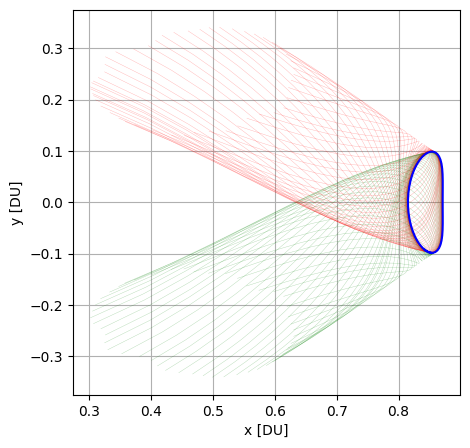

In [8]:
AA0 = [0,0.4,0,0,0,0]

tspan = np.linspace(0,3,50)

AA = AAprop(tspan,AA0,Lpt=1,nftype='Birkhoff')

NF0 = AAtoNF(AA,nftype='Birkhoff')
NF = NF0
NF[:,3] = NF[:,3] + 0.001

RTB = NFtoRTB(NF,Lpt=1,nftype='Birkhoff',method='anl')

manifold_tspan = np.linspace(0,3.5,50)

# Propagate and plot stable manifold
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot()
for n in range(len(RTB)):
    stable_manifold = RTBprop(-manifold_tspan,RTB[n,:])
    ax.plot(stable_manifold[0],stable_manifold[1],color='green',linewidth=0.3,alpha=0.3)

NF = NF0
NF[:,0] = NF[:,0] - 0.001
# Sign of "step-off" value is selected so that we move away from the moon!

RTB = NFtoRTB(NF,Lpt=1,nftype='Birkhoff',method='anl')

# Propagate and plot unstable manifold
for n in range(len(RTB)):
    unstable_manifold = RTBprop(manifold_tspan,RTB[n,:])
    ax.plot(unstable_manifold[0],unstable_manifold[1],color='red',linewidth=0.3,alpha=0.3)

ax.plot(RTB[:,0],RTB[:,1],color='blue')
ax.set_xlabel('x [DU]')
ax.set_ylabel('y [DU]')
plt.grid()
plt.show()

    



## Inverse Transformation

So far, we have only examined the transformations that go in the
forward direction, from the action-angle/normal form spaces to
restricted three-body space. We will now cover the transformations that
go in the opposite direction.

Transforming a restricted three-body state to its corresponding
action-angle state can be done by calling the RTBtoAA function.

Just like with AAtoRTB, the libration point, normal form type, and
transformation type are all optional arguments that can be included.

When transforming from RTB to AA, the numerical transformation is much
more accurate, albeit quite a bit slower than the analytical
transformation.

If only a rough estimate of the action-angle state is needed, the
analytical transformation suffices. If sensitivity matrices or
Jacobians are needed, then the numerical transformation should be used.

This example shows that the composition of the numerical transformation
and its inverse is much closer to the identity transformation.


### RTBtoAA:
$[I_1,I_2,I_3,\phi_1,\phi_2,\phi_3] \to [x,y,x,\dot{x},\dot{y},\dot{z}]$ (Birkhoff)

$[\hat{I}_1,\hat{I}_2,\hat{I}_3,\theta_1,\theta_2,\theta_3] \to [x,y,x,\dot{x},\dot{y},\dot{z}]$ (Resonant)

In [9]:
RTBanl = AAtoRTB([0,0.1,0.007,0,0,0],Lpt=1,nftype='Birkhoff',method='anl');
RTBnum = AAtoRTB([0,0.1,0.007,0,0,0],Lpt=1,nftype='Birkhoff',method='num');

print(RTBtoAA(RTBanl,Lpt=1,nftype='Birkhoff',method='anl'))
print(RTBtoAA(RTBnum,Lpt=1,nftype='Birkhoff',method='num'))


[ 2.30126976e-11+0.j          1.00045012e-01+0.j
  7.00156705e-03+0.j         -4.24127036e-02+4.71238898j
  6.28316926e+00+0.j          6.28283070e+00+0.j        ]
[9.11811775e-31+0.j 1.00000000e-01+0.j 7.00000000e-03+0.j
 5.27528073e-01+0.j 6.28318531e+00+0.j 6.28318531e+00+0.j]


## Inverse Transformation Example

Just like with the forward transformation, the inverse transformation
can be broken up into two stages, with functions RTBtoNF and NFtoAA.

Consider the following scenario. An initial action-angle state is
defined such that it lies on a somewhat large Lyapunov orbit, and we
would like to obtain its propagated state within the RTB frame. Rather
than propagating in the action-angle space with AAprop, we want to
transform the AA state into the RTB and then propagate it according to
the full CR3BP equations of motion.

Naturally, this trajectory eventually departs from the desired
Lyapunov, and we would like to quantify this departure by transforming
the propagated restricted three-body states back into the normal form
space to examine the unstable component, xtilde, and then finally back
to the action-angle space, so we can see if the actions truly remain
constant.

Run the example and notice how the magnitude of the unstable component
increases, while the actions stay fairly constant. Notice also that the
numerical transformation is much more accurate.

This example takes a few seconds to run due to the use of the slow but
accurate numerical transformation.

To summarize:

### RTBtoNF
$[x,y,z,\dot{x},\dot{y},\dot{z}] \to [\tilde{x},\tilde{y},\tilde{z},\tilde{p}_x,\tilde{p}_y,\tilde{p}_z]$

### NFtoAA     
$[\tilde{x},\tilde{y},\tilde{z},\tilde{p}_x,\tilde{p}_y,\tilde{p}_z] \to [I_1,I_2,I_3,\phi_1,\phi_2,\phi_3]$ (Birkhoff)

$[\tilde{x},\tilde{y},\tilde{z},\tilde{p}_x,\tilde{p}_y,\tilde{p}_z] \to [\hat{I}_1,\hat{I}_2,\hat{I}_3,\theta_1,\theta_2,\theta_3]$ (Resonant)



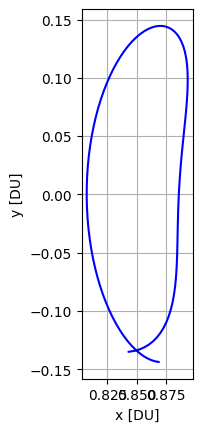

In [10]:

AA0 = [0,0.8,0,0,0,0]

RTB0 = AAtoRTB(AA0)

tspan = np.linspace(0,3,100)

RTB = RTBprop(tspan,RTB0)

#Plotting stuff:
fig2 = plt.figure()
ax = fig2.add_subplot()
ax.plot(RTB[0],RTB[1],color='blue')
ax.set_aspect('equal')
ax.set_xlabel('x [DU]')
ax.set_ylabel('y [DU]')
plt.grid()
plt.show()


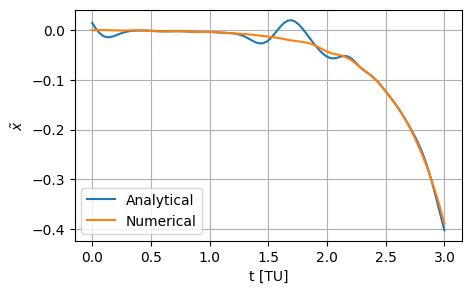

In [11]:

NFanl = RTBtoNF(RTB,Lpt=1,nftype='Birkhoff')
NFnum = RTBtoNF(RTB,Lpt=1,nftype='Birkhoff',method='num')

#Plotting stuff:
fig3 = plt.figure(figsize=[5,3])
ax1 = fig3.add_subplot()
ax1.plot(tspan,NFanl[0].real,label='Analytical')
ax1.plot(tspan,NFnum[0].real,label='Numerical')
ax1.set_xlabel('t [TU]')
ax1.set_ylabel(r'$\tilde{x}$')
plt.grid()
plt.legend()
plt.show()

Notce that the numerical transformation captures a much smoother exponential increase in the unstable component, $\tilde{x}$. The only downside is that the numerical transformation is slower.

Let's look at how the actions vary, keeping in mind that they should (in theory) be constant.

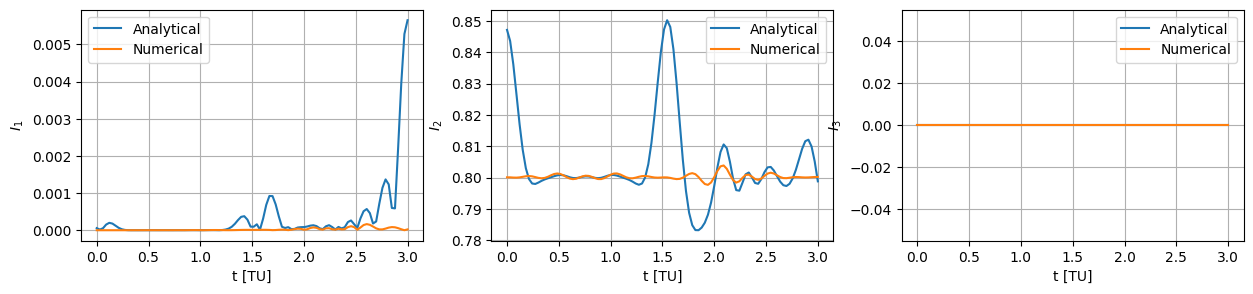

In [13]:
AAanl = NFtoAA(NFanl,Lpt=1,nftype='Birkhoff')
AAnum = NFtoAA(NFnum,Lpt=1,nftype='Birkhoff',method='num')

#Plotting stuff:
fig3 = plt.figure(figsize=[15,3])
ax1 = fig3.add_subplot(131)
ax1.plot(tspan,AAanl[0].real,label='Analytical')
ax1.plot(tspan,AAnum[0].real,label='Numerical')
ax1.set_xlabel('t [TU]')
ax1.set_ylabel('$I_1$')
plt.grid()
plt.legend()
ax2 = fig3.add_subplot(132)
ax2.plot(tspan,AAanl[1].real,label='Analytical')
ax2.plot(tspan,AAnum[1].real,label='Numerical')
ax2.set_xlabel('t [TU]')
ax2.set_ylabel('$I_2$')
plt.grid()
plt.legend()
ax3 = fig3.add_subplot(133)
ax3.plot(tspan,AAanl[2].real,label='Analytical')
ax3.plot(tspan,AAnum[2].real,label='Numerical')
ax3.set_xlabel('t [TU]')
ax3.set_ylabel('$I_3$')
plt.grid()
plt.legend()
plt.show()

## Smaller Functions

The time derivatives of the angles can be calculated easily using the $AApartials$ function. Make sure to specify the correct libration point and normal form type.

### AApartials:

Birkhoff:   $\frac{d}{dt}\left[I_1,I_2,I_3,\phi_1,\phi_2,\phi_3\right] =\left[0,0,0,\dot{\phi}_1,\dot{\phi}_2,\dot{\phi}_3\right]$

Resonant:   $\frac{d}{dt}\left[\hat{I}_1,\hat{I}_2,\hat{I}_3,\theta_1,\theta_2,\theta_3\right] =\left[0,\dot{\hat{I}}_2,0,\dot{\theta}_1,\dot{\theta}_2,\dot{\theta}_3\right]$

In [16]:
AABirkhoff = [0,0.1,0.007,0,0,0]
AAResonant = [0,0.1,0.107,0,0,0]

print(AApartials(AABirkhoff,Lpt=2,nftype='Birkhoff'))
print(AApartials(AAResonant,Lpt=2,nftype='Resonant'))

[0.         0.         0.         2.11531161 1.85223361 1.7969121 ]
[0.         0.         0.         2.11535723 0.07428581 1.77617269]


The Hamiltonian can be evaluated at a particular action-angle state using the $Heval$ function. Make sure that the correct libration point and normal form type are specified, as each will have their own Hamiltonian.

### Heval

Birkhoff: $h = H(I_1,I_2,I_3,\phi_1,\phi_2,\phi_3)$

Resonant: $h = H(\hat{I}_1,\hat{I}_2,\hat{I}_3,\theta_1,\theta_2,\theta_3)$

In [14]:
AABirkhoff = [0,0.1,0.007,0,0,0]
AAResonant = [0,0.1,0.107,0,0,0]

print(Heval(AABirkhoff,Lpt=2,nftype='Birkhoff'))
print(Heval(AAResonant,Lpt=2,nftype='Resonant'))

0.1982802903780813
0.1981332611145093
